## Setup

In [ ]:
%pip install --upgrade plotly

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_data = pd.read_csv('banklist.csv', encoding='latin-1')

## Data Exploration & Cleaning

In [ ]:
# Removing spaces from the column names
df_data.columns = df_data.columns.str.replace(' ', '_')

In [ ]:
df_data.shape

(569, 7)

In [ ]:
df_data.columns

Index(['Bank_Name', 'City', 'State', 'Cert', 'Acquiring_Institution',
       'Closing_Date', 'Fund'],
      dtype='object')

In [ ]:
df_data.describe()

,Cert,Fund
count,569.000000,569.000000
mean,31653.056239,10042.210896
std,16464.868900,1110.637083
min,91.000000,4645.000000
25%,20115.000000,10118.000000
50%,32102.000000,10260.000000
75%,35372.000000,10402.000000
max,59017.000000,10546.000000


In [ ]:
df_data.head()

,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Fund
0,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",26-Apr-24,10546
1,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545
2,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
3,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
4,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540


In [ ]:
df_data.tail()

,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Fund
564,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,6004
565,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,4648
566,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,4647
567,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,4646
568,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,13-Oct-00,4645


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank_Name              569 non-null    object
 1   City                   569 non-null    object
 2   State                  569 non-null    object
 3   Cert                   569 non-null    int64 
 4   Acquiring_Institution  569 non-null    object
 5   Closing_Date           569 non-null    object
 6   Fund                   569 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.2+ KB


In [ ]:
print(f'Does Bank_Name have any duplicated values? {df_data.Bank_Name.duplicated().values.any()}')
print(f'Does City have any duplicated values? {df_data.City.duplicated().values.any()}')
print(f'Does State have any duplicated values? {df_data.State.duplicated().values.any()}')
print(f'Does Cert have any duplicated values? {df_data.Cert.duplicated().values.any()}')
print(f'Does Acquiring_Institution have any duplicated values? {df_data.Acquiring_Institution.duplicated().values.any()}')
print(f'Does Closing_Date have any duplicated values? {df_data.Closing_Date.duplicated().values.any()}')
print(f'Does Fund have any duplicated values? {df_data.Fund.duplicated().values.any()}')

Does Bank_Name have any duplicated values? True
Does City have any duplicated values? True
Does State have any duplicated values? True
Does Cert have any duplicated values? False
Does Acquiring_Institution have any duplicated values? True
Does Closing_Date have any duplicated values? True
Does Fund have any duplicated values? False


In [ ]:
print(f'Are there any NaN values? {df_data.isna().values.any()}')

Are there any NaN values? False


In [ ]:
print(f'Number of unique bank names: {df_data.Bank_Name.nunique()}')
print(f'Top 5 most common bank names: {df_data.Bank_Name.value_counts().nlargest(5)}')

Number of unique bank names: 551
Top 5 most common bank names: Bank_Name
The First State Bank    3
Premier Bank            3
Horizon Bank            3
First State Bank        3
Valley Bank             2
Name: count, dtype: int64


In [ ]:
print(f'Number of unique acquiring institutions: {df_data.Acquiring_Institution.nunique()}')
print(f'Top 5 most common acquiring institutions: {df_data.Acquiring_Institution.value_counts().nlargest(5)}')

Number of unique acquiring institutions: 303
Top 5 most common acquiring institutions: Acquiring_Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64


In [ ]:
print(f'Number of States that have failed banks: {df_data.State.nunique()}')
print(f'Number of failed banks per State: {df_data.State.value_counts().nlargest(10)}')

Number of States that have failed banks: 44
Number of failed banks per State: State
GA    93
FL    76
IL    69
CA    43
MN    23
WA    19
MO    16
AZ    16
MI    14
TX    13
Name: count, dtype: int64


In [ ]:
print(f'Number of unique closing dates: {df_data.Closing_Date.nunique()}')
print(f'Are there any duplicates? {df_data["Closing_Date"].duplicated().values.any()}')

Number of unique closing dates: 264
Are there any duplicates? True


In [ ]:
# Convert Closing_Date to datetime object
df_data.Closing_Date = pd.to_datetime(df_data.Closing_Date, format="%d-%b-%y")

In [ ]:
df_data.info()
df_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank_Name              569 non-null    object        
 1   City                   569 non-null    object        
 2   State                  569 non-null    object        
 3   Cert                   569 non-null    int64         
 4   Acquiring_Institution  569 non-null    object        
 5   Closing_Date           569 non-null    datetime64[ns]
 6   Fund                   569 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 31.2+ KB


,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Fund
0,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",2024-04-26,10546
1,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,2023-11-03,10545
2,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",2023-07-28,10544
3,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",2023-05-01,10543
4,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,10540


In [ ]:
print(f'Number of unique closing dates: {df_data.Closing_Date.nunique()}')
print(f'Are there any duplicates? {df_data["Closing_Date"].duplicated().values.any()}')

Number of unique closing dates: 264
Are there any duplicates? True


## Visualizations

### Failures by Year

In [ ]:
failures_by_year = df_data.groupby(df_data.Closing_Date.dt.year, as_index=False).size()
failures_by_year.rename(columns = {'Closing_Date' : 'Year', 'size' : 'Total'}, inplace = True)

In [ ]:
failures_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    20 non-null     int32
 1   Total   20 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 368.0 bytes


In [ ]:
v_bar = px.bar(
        x = failures_by_year.Year,
        y = failures_by_year.Total,
        title='Number of Bank Failures by Year')

v_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Number of Bank Failures')

v_bar.show()

### Number of Bank Failures by State

In [ ]:
failures_by_state = df_data.groupby(df_data.State, as_index=False).size()
failures_by_state.rename(columns = {'size' : 'Total'}, inplace = True)

In [ ]:
v_pie = px.pie(
        names = failures_by_state.State,
        values = failures_by_state.Total,
        title='Number of Bank Failures by State')
v_pie.update_traces(textposition='inside', textinfo='percent+label')

v_pie.show()

In [ ]:
fig = px.choropleth(
        locations = failures_by_state.State,
        locationmode = 'USA-states',
        scope = 'usa',
        color = failures_by_state.Total)

fig.update_layout(title = 'Number of Bank Failures by State')
fig.show()

### Number of Bank Failures over Time by State

In [ ]:
temp_df = df_data
temp_df['Year'] = temp_df.Closing_Date.dt.year
temp_df['Month'] = temp_df.Closing_Date.dt.month

In [ ]:
failures_by_state_time = temp_df.groupby(['Year', 'State'], as_index=False).size()
failures_by_state_time.rename(columns = {'size' : 'Total'}, inplace = True)

In [ ]:
v_bar = px.bar(
        failures_by_state_time,
        x = 'Year',
        y = 'Total',
        color = 'State',
        title = 'Number of Bank Failures over Time grouped by State')

v_bar.update_layout(xaxis_title='Year',
                    yaxis_title='Number of Bank Failures')

v_bar.show()

### Top 10 Acquiring Institutions

In [ ]:
del(top_acquiring_institutions)

In [ ]:
top_acquiring_institutions = df_data.groupby(df_data.Acquiring_Institution, as_index=False).size().sort_values(by='size', ascending=False).head(10)
top_acquiring_institutions.rename(columns = {'size' : 'Total'}, inplace = True)

In [ ]:
v_pie = px.pie(
        names = top_acquiring_institutions.Acquiring_Institution,
        values = top_acquiring_institutions.Total,
        title='Top Acquiring Institutions')
v_pie.update_traces(textposition='inside', textinfo='percent+label')

v_pie.show()

In [ ]:
fig = px.histogram(
        top_acquiring_institutions,
        x = 'Acquiring_Institution',
        y = 'Total',
        title = 'Top Acquiring Institutions')

fig.update_layout(xaxis_title='Acquiring Institution',
                  yaxis_title='Number of Bank Acquired')
fig.show()

### Top Acquiring Institutions over Time

In [ ]:
top_acquiring_institutions_time = temp_df.groupby(['Year', 'Acquiring_Institution'], as_index=False).size()
top_acquiring_institutions_time.rename(columns = {'size' : 'Total'}, inplace = True)

In [ ]:
top_10 = top_acquiring_institutions_time.sort_values('Total', ascending = False).groupby('Acquiring_Institution', sort = False).head(2)
top_10 = top_10.head(10)
top_10.head()

,Year,Acquiring_Institution,Total
104,2009,No Acquirer,11
127,2009,U.S. Bank N.A.,9
197,2010,No Acquirer,8
113,2009,State Bank and Trust Company,8
146,2010,Centennial Bank,6


In [ ]:
top_institutions = top_acquiring_institutions_time[top_acquiring_institutions_time.Acquiring_Institution.isin(top_10.Acquiring_Institution)]

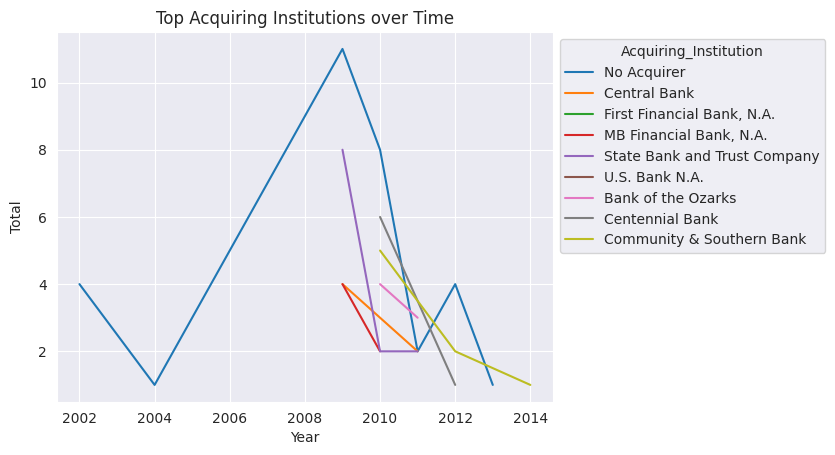

In [ ]:
sns.set_style("darkgrid")
fig = sns.lineplot(data = top_institutions, x = 'Year', y = 'Total', hue = 'Acquiring_Institution')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.title('Top Acquiring Institutions over Time')
plt.show()

In [ ]:
v_bar = px.bar(
        top_institutions,
        x = 'Year',
        y = 'Total',
        color = 'Acquiring_Institution',
        title = 'Top 10 Acquiring Institutions over Time')

v_bar.show()

## Failures by Month

In [ ]:
failures_by_month = temp_df.groupby(temp_df.Month, as_index=False).size()
failures_by_month.rename(columns = {'size' : 'Total'}, inplace = True)

In [ ]:
v_bar = px.bar(
        failures_by_month,
        x = 'Month',
        y = 'Total',
        title = 'Failures by Month')

v_bar.show()

## Which Cities experienced the most bank failures

In [ ]:
temp_df['City_State'] = temp_df['City'] + ', ' + temp_df['State']

In [ ]:
temp_df.head()

,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Fund,Year,Month,City_State
0,Republic First Bank dba Republic Bank,Philadelphia,PA,27332,"Fulton Bank, National Association",2024-04-26,10546,2024,4,"Philadelphia, PA"
1,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,2023-11-03,10545,2023,11,"Sac City, IA"
2,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",2023-07-28,10544,2023,7,"Elkhart, KS"
3,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",2023-05-01,10543,2023,5,"San Francisco, CA"
4,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,10540,2023,3,"New York, NY"


In [ ]:
failures_by_city = temp_df.groupby(temp_df.City_State, as_index=False).size().sort_values(by='size', ascending=False)
failures_by_city.rename(columns = {'size' : 'Total'}, inplace = True)

In [ ]:
failures_by_city.head()

,City_State,Total
74,"Chicago, IL",20
16,"Atlanta, GA",10
309,"Phoenix, AZ",6
262,"Naples, FL",5
208,"Las Vegas, NV",4


In [ ]:
fig = px.histogram(
        failures_by_city,
        x = 'City_State',
        y = 'Total',
        title = 'Bank Failures by City')

fig.update_layout(xaxis_title='City',
                  yaxis_title='Number of Bank Failures')
fig.show()

In [ ]:
top_10_city = failures_by_city.sort_values('Total', ascending = False).groupby('City_State', sort = False).head(2)
top_10_city = top_10_city.head(10)
top_10_city.head()

,City_State,Total
74,"Chicago, IL",20
16,"Atlanta, GA",10
309,"Phoenix, AZ",6
262,"Naples, FL",5
208,"Las Vegas, NV",4


In [ ]:
top_cities = failures_by_city[failures_by_city.City_State.isin(top_10_city.City_State)]

In [ ]:
fig = px.histogram(
        top_cities,
        x = 'City_State',
        y = 'Total',
        title = 'Bank Failures by City')

fig.update_layout(xaxis_title='City',
                  yaxis_title='Number of Bank Failures')
fig.show()